In [146]:
# Import necessary packages
from __future__  import print_function, division
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np
from scipy import stats
import os
%matplotlib inline

In [73]:
# Function for downloading citibike data and unzip it.
def getcitiDatacsv(datestring):
    import requests
    import zipfile
    import StringIO
    zip_file_url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"
    r = requests.get(zip_file_url, stream=True)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z.extractall()

In [74]:
# Read June 2015 citibike data as a dataframe
datastring = '201506'
getcitiDatacsv(datastring)
df = pd.read_csv(datastring+"-citibike-tripdata.csv")

In [75]:
# Create a new column of 'age' from the 'birth year' column. Assuming age = 2015-birth year
df['age'] = 2015 - df['birth year']

In [76]:
# Create a new dataframe df1 with only age information
df1 = pd.DataFrame(df['age'])

In [77]:
# Drop NAs in df1
df1.dropna(inplace=True)

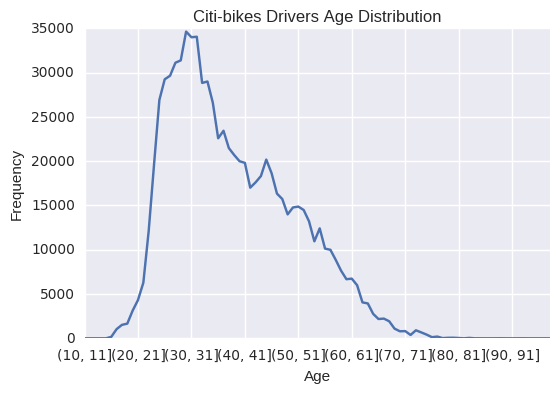

In [123]:
# Plot the age distribution
bins = np.arange(10, 99, 1)
dist = df1.age.groupby(pd.cut(df1.age, bins)).agg([np.count_nonzero])
ax1 = dist.plot()
ax1.legend('')
ax1.set(xlabel='Age', ylabel='Frequency', title='Citi-bikes Drivers Age Distribution')
plt.show()

# Figure 1: Citi-bikers Age Distribution for June, 2015

In [124]:
# Normalize the age distribution
dist['normalized_age'] = dist['count_nonzero'] / int(dist.sum())

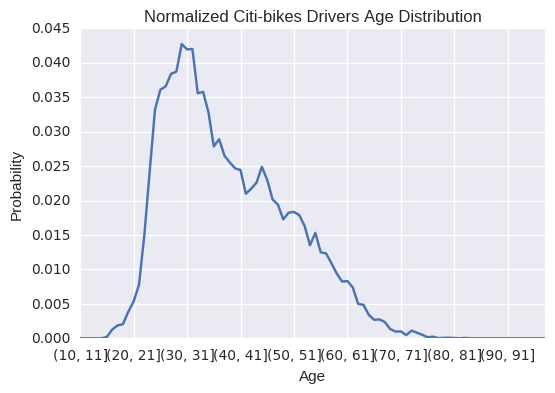

In [127]:
# Plot the normalized age distribution
ax2 = dist.normalized_age.plot()
ax2.legend('')
ax2.set(xlabel='Age', ylabel='Probability', title='Normalized Citi-bikes Drivers Age Distribution')
plt.show()

# Figure 2: Normalized Citi-bikers Age Distribution for June, 2015

# Gaussian Goodness of fit

# K-S Test

# Null Hypothesis:
$H_0$: The age distribution of citibike drivers during June, 2015 is drawn from a Gaussian Distribution.
Significance level $\alpha$: 0.05.

In [153]:
# Fit a normal distribution to df1.age
miu, std = stats.norm.fit(df1.age)

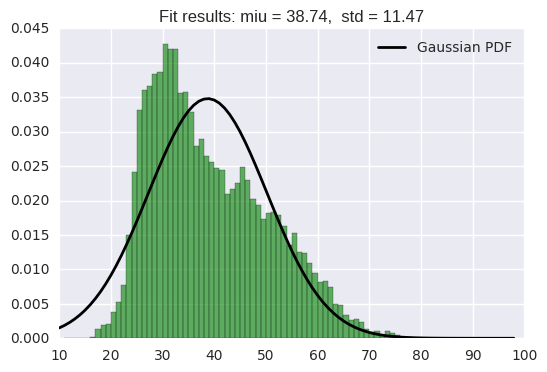

In [224]:
# plot the fitted normal distribution with age distribution
plt.hist(df1.age, bins, normed=True, alpha=0.6, color='g')
pdf_fitted = norm.pdf(bins, miu, std)
plt.plot(bins, pdf_fitted, 'k', linewidth=2, label='Gaussian PDF')
title = "Fit results: miu = %.2f,  std = %.2f" % (miu, std)
plt.title(title)
plt.legend(loc='best', frameon=False)
plt.show()

# Figure 3: Fitted Gaussian Distribution with Age Histogram

In [185]:
# K-S test for gaussion model goodness fit
stats.kstest(df1.age, 'norm', args=(miu, std))

KstestResult(statistic=0.10309703216239841, pvalue=0.0)

# From the K-S test for goodness of fit result, it is found that the Gaussian Model is not sensible for the age distribution. The p-value is almost 0, which is less than 0.05, therefore, the null hypothesis is rejected.

# A-D Test

# Null Hypothesis:
$H_0$: The age distribution of citibike drivers during June, 2015 is drawn from a Gaussian distribution.
Significance level $\alpha$: 0.05.

In [186]:
stats.anderson(df1.age, 'norm')

AndersonResult(statistic=11329.465162464767, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

# From the A-D test for significance level of 5%, the critical value should be 0.787. However, the A-D test statistic is much larger than this value. Thus, the null hypothesis is rejected.

# Rayleigh Goodness of Fit

# Null Hypothesis:
$H_0$: The age distribution of citibike drivers during June, 2015 is drawn from a Rayleigh distribution.
Significance level $\alpha$: 0.05.

In [215]:
# Fit Rayleigh distribution to df1.age
par_rayleigh = stats.rayleigh.fit(df1.age)

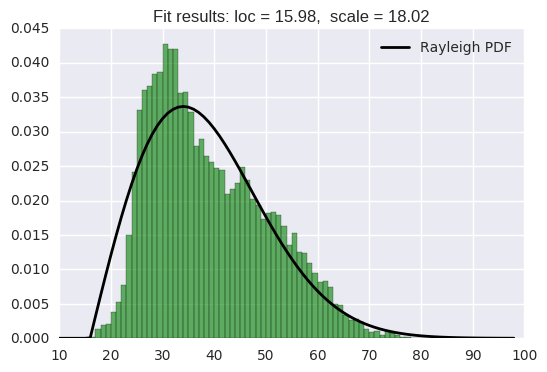

In [226]:
# plot the fitted rayleigh distribution with age distribution
plt.hist(df1.age, bins, normed=True, alpha=0.6, color='g')
pdf_fitted = stats.rayleigh.pdf(bins, par_rayleigh[0], par_rayleigh[1])
plt.plot(bins, pdf_fitted, 'k', linewidth=2, label='Rayleigh PDF')
title = "Fit results: loc = %.2f,  scale = %.2f" % (par_rayleigh[0], par_rayleigh[1])
plt.title(title)
plt.legend(loc='best', frameon=False)
plt.show()

# Figure 4: Fitted Rayleigh Distribution with Age Histogram

In [227]:
# K-S test for rayleigh model goodness fit
stats.kstest(df1.age, 'rayleigh', args=(par_rayleigh[0], par_rayleigh[1]))

KstestResult(statistic=0.057000284926689702, pvalue=0.0)

# From the K-S test for goodness of fit result, it is found that Rayleigh Model is not sensible for the age distribution. The p-value is almost 0, which is less than 0.05, therefore, the null hypothesis is rejected.

# Pearson's Chi-square Test

# Null Hypothesis:
$H_0$: The age distribution of citibike drivers during June, 2015 is drawn from a Rayleigh distribution.
Significance level $\alpha$: 0.05.

In [237]:
# Generate random variables of length same as df1.age. Use loc and scale information previously obtained from fitting.
r = stats.rayleigh.rvs(loc=par_rayleigh[0], scale=par_rayleigh[1], size=len(df1.age), random_state=1)

In [288]:
# Categorize df1.age to 5 years' intervals for Chi-square test requirement (No category with less than 5)
bins2 = np.arange(15, 95, 5)
dist2 = df1.age.groupby(pd.cut(df1.age, bins2)).agg([np.count_nonzero])
# Same for the fitted model
df_fitted = pd.DataFrame(r)
dist2_fitted = df_fitted[0].groupby(pd.cut(df_fitted[0], bins2)).agg([np.count_nonzero])

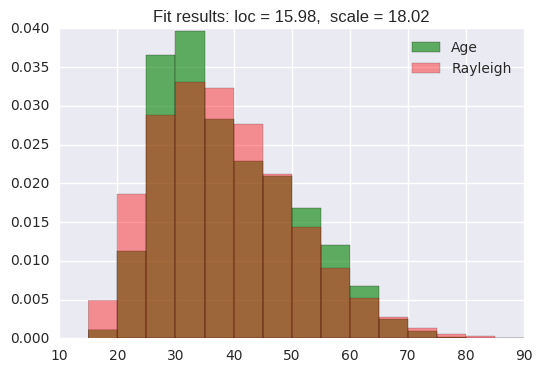

In [301]:
# Plot the age distribution histogram with the fitted Rayleigh distribution curve
plt.hist(df1.age, bins2, normed=True, alpha=0.6, color='g', label='Age')
plt.hist(df_fitted[0], bins2, normed=True, alpha=0.4, color='r', label='Rayleigh')
title = "Fit results: loc = %.2f,  scale = %.2f" % (par_rayleigh[0], par_rayleigh[1])
plt.title(title)
plt.legend(loc='best', frameon=False)
plt.show()

# Figure 5 Categorized age distribution with Fitted Rayleigh Distribution

In [285]:
# Calculate Chi-square test for goodness of fit with Rayleigh distribution
stats.chisquare(dist2, dist2_fitted)

Power_divergenceResult(statistic=array([ 38384.36974986]), pvalue=array([ 0.]))

# From the Chi-square test for goodness of fit result, it is found that Rayleigh Model is not sensible for the age distribution. The p-value is almost 0, which is far less than 0.05, therefore, the null hypothesis is rejected.